<a href="https://colab.research.google.com/github/karlex7/4inrRow/blob/master/Zavrsni_rad_Karlo_Hren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of bitcoin price movment with Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Data Quality Analysis

In [ ]:
#data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/BITFINEX_BTCUSD, 240.csv')
data = pd.read_csv('/content/BITFINEX_BTCUSD, 5.csv')
data.head()

,time,open,high,low,close,Volume,Volume MA,MA,MA.1,MA.2,MA.3,RSI,K,D
0,2020-09-21T16:35:00Z,10452.00000,10453.00000,10431.0,10450.00000,17.830053,30.742819,10793.52961,10513.39867,10430.22630,10433.32258,48.525116,97.682133,81.636830
1,2020-09-21T16:40:00Z,10449.52246,10450.79394,10430.0,10430.07787,193.623805,37.737133,10791.09379,10510.73944,10428.67939,10432.67364,44.182390,88.379293,88.716699
2,2020-09-21T16:45:00Z,10429.60844,10445.00000,10412.0,10419.00000,49.708128,37.632216,10788.51353,10507.63944,10426.45345,10429.93891,41.935003,71.528453,85.863293
3,2020-09-21T16:50:00Z,10419.00000,10429.00000,10409.0,10419.00000,7.387479,37.539727,10785.92853,10504.79944,10424.67091,10427.75113,41.935003,55.531593,71.813113
4,2020-09-21T16:55:00Z,10419.00000,10419.00000,10401.0,10403.00000,5.663080,36.097773,10783.21413,10501.35821,10424.11535,10422.80090,38.642496,41.565288,56.208445


In [ ]:
data.shape

(10624, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10624 entries, 0 to 10623
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       10624 non-null  object 
 1   open       10624 non-null  float64
 2   high       10624 non-null  float64
 3   low        10624 non-null  float64
 4   close      10624 non-null  float64
 5   Volume     10624 non-null  float64
 6   Volume MA  10624 non-null  float64
 7   MA         10624 non-null  float64
 8   MA.1       10624 non-null  float64
 9   MA.2       10624 non-null  float64
 10  MA.3       10624 non-null  float64
 11  RSI        10624 non-null  float64
 12  K          10624 non-null  float64
 13  D          10624 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


 1.   time - Time of the recorded price

---

 2.  open - Open price
 
---


 3.   high - Highest price
 
---


 4.  low - Lowest price
 
---


 5.  close - Closed price
 
---


 6.  MA - Exponential moving average 9
 
---


 7.  MA.1 - Moving average 9
 
---


 8.  MA.2 - Moving average 50
 
---


 9.  MA.3 - Moving average 200
 
---


 10.  RSI - Relative strength index
 
---


 11. K - Stoch RSI K index
 
---


 12. D - Stoch RSI D index

### 1.1. Missing values

In [ ]:
data.isnull().sum()

time         0
open         0
high         0
low          0
close        0
Volume       0
Volume MA    0
MA           0
MA.1         0
MA.2         0
MA.3         0
RSI          0
K            0
D            0
dtype: int64

Columns Volume and Volume MA contain no value so we can drop them

In [ ]:
data[['time', 'open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D']].head()

,time,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
0,2020-09-21T16:35:00Z,10452.00000,10453.00000,10431.0,10450.00000,10793.52961,10513.39867,10430.22630,10433.32258,48.525116,97.682133,81.636830
1,2020-09-21T16:40:00Z,10449.52246,10450.79394,10430.0,10430.07787,10791.09379,10510.73944,10428.67939,10432.67364,44.182390,88.379293,88.716699
2,2020-09-21T16:45:00Z,10429.60844,10445.00000,10412.0,10419.00000,10788.51353,10507.63944,10426.45345,10429.93891,41.935003,71.528453,85.863293
3,2020-09-21T16:50:00Z,10419.00000,10429.00000,10409.0,10419.00000,10785.92853,10504.79944,10424.67091,10427.75113,41.935003,55.531593,71.813113
4,2020-09-21T16:55:00Z,10419.00000,10419.00000,10401.0,10403.00000,10783.21413,10501.35821,10424.11535,10422.80090,38.642496,41.565288,56.208445


In [ ]:
data = data[['time', 'open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D']]

### 1.2. Extremes

In [ ]:
def describe_data(dataset):
    values = []
    for col in dataset.columns:
        values.append({
            'Column': col,
            'Mean': round(np.mean(dataset[col]), 2),
            'Min': round(np.min(dataset[col]), 2),
            'Max': round(np.max(dataset[col]), 2),
            'Std': round(np.std(dataset[col]), 2),
            'Max Z-Val': round(np.abs(max(stats.zscore(dataset[col]))), 2)
        })
    return pd.DataFrame(values)

In [ ]:
describe_data(data.iloc[:, 1:])
# we include every column except time

,Column,Mean,Min,Max,Std,Max Z-Val
0,open,11395.49,10190.01,13835.38,919.71,2.65
1,high,11401.56,10221.28,13839.00,921.85,2.64
2,low,11389.28,10152.00,13819.00,917.10,2.65
3,close,11395.69,10195.00,13835.38,919.83,2.65
4,MA,11368.75,10319.18,13696.07,894.37,2.60
5,MA.1,11389.13,10272.16,13763.74,915.41,2.59
6,MA.2,11394.64,10254.78,13805.18,919.21,2.62
7,MA.3,11394.64,10255.55,13804.80,919.12,2.62
8,RSI,51.72,6.93,96.02,11.65,3.80
9,K,51.08,0.00,100.00,32.38,1.51


Kolona RSI nam ima najveci Z-score, ona nam oznacava tehnicki indokator

### 1.3. Distribution of each variable

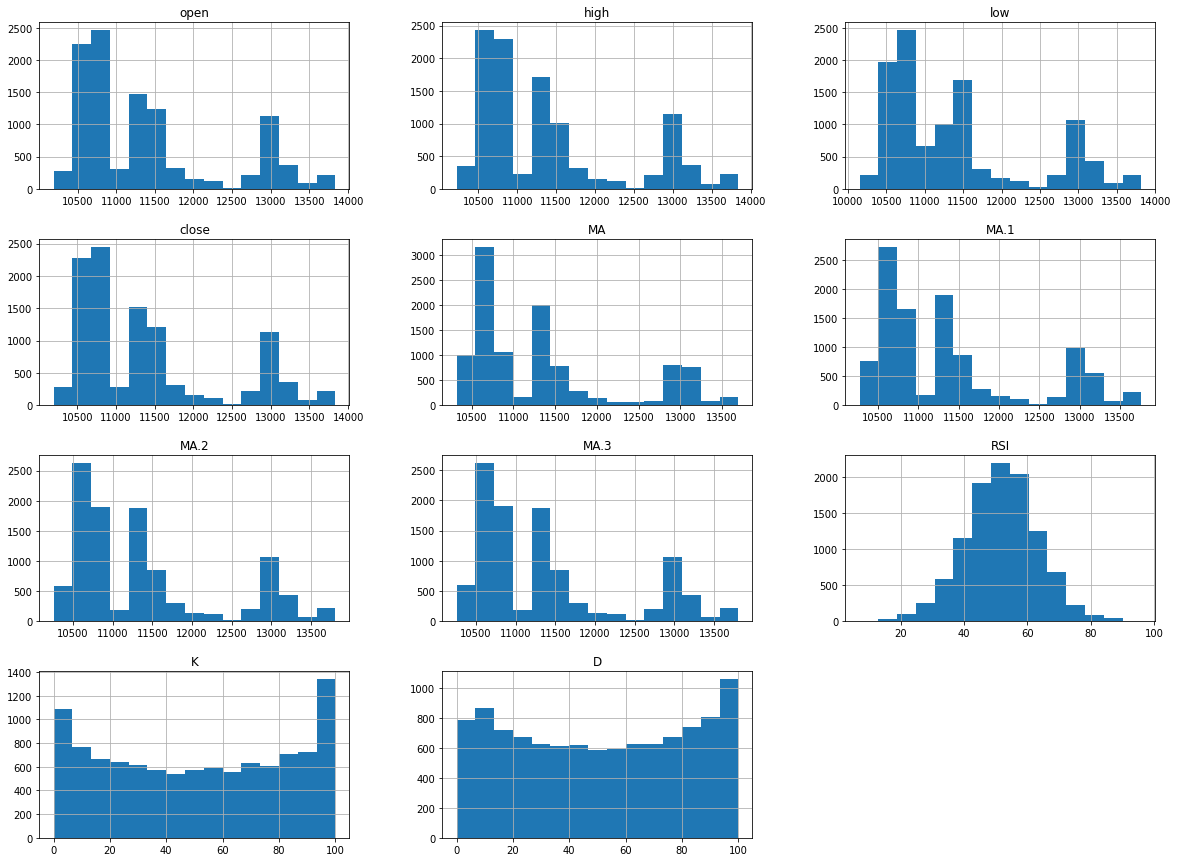

In [ ]:
data.hist(bins=15, figsize=(20, 15));

Open, High, Low and Close are vary similar

## 2. Univariat Analysis

In [ ]:
data.describe()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
count,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000,10624.000000
mean,11395.487320,11401.563347,11389.279657,11395.689507,11368.751730,11389.134562,11394.644960,11394.640460,51.716549,51.078017,51.082194
std,919.756329,921.896900,917.145150,919.874943,894.411294,915.455075,919.250776,919.165132,11.645951,32.378032,30.917509
min,10190.008660,10221.281500,10152.000000,10195.000000,10319.176380,10272.160840,10254.784420,10255.547820,6.925684,0.000000,0.000000
25%,10688.606790,10693.000000,10683.158950,10689.000000,10689.112037,10688.753980,10689.540105,10690.027538,44.219950,21.403926,22.689613
50%,11270.675570,11279.000000,11260.040445,11270.500000,11099.919690,11192.169885,11274.060580,11278.288590,51.943097,51.534242,51.391338
75%,11580.743193,11588.000000,11574.988968,11581.250000,11532.307638,11575.499755,11577.377423,11578.549100,59.299666,81.233997,79.540496
max,13835.381660,13839.000000,13819.000000,13835.381660,13696.066100,13763.741960,13805.175620,13804.798530,96.024883,100.000000,100.000000


### 2.1. Data skewnes

In [ ]:
def skewnes_for_data(data):
  for col in data:
    skewnes = round(data[col].skew(), 2)
    print(col, '\t', skewnes)

In [ ]:
skewnes_for_data(data.iloc[:, 1:])

open 	 1.03
high 	 1.03
low 	 1.02
close 	 1.03
MA 	 1.06
MA.1 	 1.04
MA.2 	 1.03
MA.3 	 1.03
RSI 	 -0.04
K 	 -0.02
D 	 -0.02


Data is not so skewed

### 2.2. Ploting Data

For ploting the data we should set time as our index

In [ ]:
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']
data.head()

,time,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D
time,,,,,,,,,,,,
2020-09-21 16:35:00+00:00,2020-09-21 16:35:00+00:00,10452.00000,10453.00000,10431.0,10450.00000,10793.52961,10513.39867,10430.22630,10433.32258,48.525116,97.682133,81.636830
2020-09-21 16:40:00+00:00,2020-09-21 16:40:00+00:00,10449.52246,10450.79394,10430.0,10430.07787,10791.09379,10510.73944,10428.67939,10432.67364,44.182390,88.379293,88.716699
2020-09-21 16:45:00+00:00,2020-09-21 16:45:00+00:00,10429.60844,10445.00000,10412.0,10419.00000,10788.51353,10507.63944,10426.45345,10429.93891,41.935003,71.528453,85.863293
2020-09-21 16:50:00+00:00,2020-09-21 16:50:00+00:00,10419.00000,10429.00000,10409.0,10419.00000,10785.92853,10504.79944,10424.67091,10427.75113,41.935003,55.531593,71.813113
2020-09-21 16:55:00+00:00,2020-09-21 16:55:00+00:00,10419.00000,10419.00000,10401.0,10403.00000,10783.21413,10501.35821,10424.11535,10422.80090,38.642496,41.565288,56.208445


In [ ]:
data = data.drop('time', axis=1)

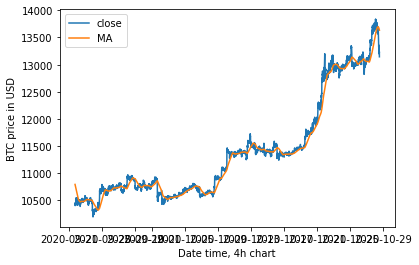

In [ ]:
plt.plot(data['close'], label='close')
plt.plot(data['MA'], label='MA')
plt.xlabel('Date time, 4h chart')
plt.ylabel('BTC price in USD')
plt.legend()
plt.show()

## 3. Preparation for Neural Network

### 3.1. Story telling - problem description

We stil have no target variable so we should create it. We will build a model that will predict if we should Buy, Hold or Sell, so we have 3 States to predict.<br>
1. Buy if the price will change more then +0.5%
2. Hold if the price will not change more then -+0.5%
3. Sell if the price will drop more then -0.5%


We are going to calculate or target wariable based on 'close' price.

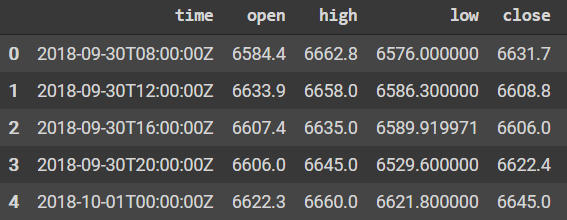

So if we have this data we are going to calculate our target price by subtraction of **close[1] - close[0]** and wwe are going to put this value in data[0] labaled as future price. <br>
In this case the calculation will be folowing 6608.8 - 6631.7 = -22,9<br>
So we are going to have a row with this values:

time	open	high	low	close	<br>
0	2018-09-30T08:00:00Z	6584.4	6662.8	6576.000000	6631.7



<table>
  <th>
    <tr>
      <td>time</td>
      <td>open</td>
      <td>high</td>
      <td>low</td>
      <td>close</td>
      <td>prediction</td>
      <td>prediction_precentage</td>
      <td>action</td>
    </tr>
  </th>
  <tr>
    <td>2018-09-30T08:00:00Z</td>
    <td>6584.4</td>
    <td>6662.8</td>
    <td>6576.000000</td>
    <td>6631.7</td>
    <td>-22.9</td>
    <td>-0.00345</td>
    <td>1</td>
  </tr>
</table>

In this case precentage change is -0.345 which means we take no action.

### 3.2. Generation target varaiable

In [ ]:
data['prediction'] = 0.0
data['prediction_precentage'] = 0.0
data['action'] = 0
data.head()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D,prediction,prediction_precentage,action
time,,,,,,,,,,,,,,
2020-09-21 16:35:00+00:00,10452.00000,10453.00000,10431.0,10450.00000,10793.52961,10513.39867,10430.22630,10433.32258,48.525116,97.682133,81.636830,0.0,0.0,0
2020-09-21 16:40:00+00:00,10449.52246,10450.79394,10430.0,10430.07787,10791.09379,10510.73944,10428.67939,10432.67364,44.182390,88.379293,88.716699,0.0,0.0,0
2020-09-21 16:45:00+00:00,10429.60844,10445.00000,10412.0,10419.00000,10788.51353,10507.63944,10426.45345,10429.93891,41.935003,71.528453,85.863293,0.0,0.0,0
2020-09-21 16:50:00+00:00,10419.00000,10429.00000,10409.0,10419.00000,10785.92853,10504.79944,10424.67091,10427.75113,41.935003,55.531593,71.813113,0.0,0.0,0
2020-09-21 16:55:00+00:00,10419.00000,10419.00000,10401.0,10403.00000,10783.21413,10501.35821,10424.11535,10422.80090,38.642496,41.565288,56.208445,0.0,0.0,0


In [ ]:
# making column 'predict'
end = data['close'].count()
for i in range(0, end):
  if i != 0:
    prediction = data['close'][i] - data['close'][i-1]
    #writing prediction price in 'prediciton' column
    data['prediction'][i-1] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# making column 'prediction_precentage'
end = data['close'].count()
for i in range(0, end):
    #calculating % change
    prediction_precentage = data['prediction'][i] / data['close'][i]
    #writing predictionprecentage in column 'prediction_precentage
    data['prediction_precentage'][i] = prediction_precentage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
step = 0.0005
end = data['close'].count()
for i in range(0, end):
  if data['prediction_precentage'][i] >= step:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 0')
    data['action'][i] = 0
  elif data['prediction_precentage'][i] <= -step:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 2')
    data['action'][i] = 2
  else:
    #print(data['prediction_precentage'][i]*100, ' - ', ' 1')
    data['action'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
buy = 0
hold = 0
sell = 0
end = data['close'].count()
for i in range(0, end):
  if data['action'][i] == 0:
    buy = buy + 1
  elif data['action'][i] == 1:
    hold =  hold + 1
  elif data['action'][i] == 2:
    sell =  sell + 1
print('BUY - ', buy)
print('HOLD - ', hold)
print('SELL - ', sell)

BUY -  2560
HOLD -  5685
SELL -  2378


## 4. Data preprocesion

### 4.1. Removing last row(invalid)

In [ ]:
data.tail()

,open,high,low,close,MA,MA.1,MA.2,MA.3,RSI,K,D,prediction,prediction_precentage,action
time,,,,,,,,,,,,,,
2020-10-28 13:30:00+00:00,13261.00000,13281.0,13230.0,13249.01886,13644.48838,13441.77858,13284.02604,13274.12070,35.400370,65.333935,72.176911,-34.01886,-0.002568,2
2020-10-28 13:35:00+00:00,13250.00000,13251.0,13207.0,13215.00000,13642.54338,13433.21858,13279.34350,13262.29656,31.578191,57.499579,65.069291,20.00000,0.001513,0
2020-10-28 13:40:00+00:00,13215.74492,13245.0,13193.0,13235.00000,13640.56838,13424.89858,13273.12128,13256.83725,35.956187,56.483870,59.772461,4.00000,0.000302,1
2020-10-28 13:45:00+00:00,13235.00000,13251.0,13234.0,13239.00000,13638.61338,13416.87858,13263.01017,13253.26980,36.826806,56.227431,56.736960,-85.63010,-0.006468,2
2020-10-28 13:50:00+00:00,13237.00000,13237.0,13117.0,13153.36990,13636.19693,13407.46598,13245.71794,13233.28982,28.039242,45.378105,52.696468,-9.41974,-0.000716,2


Last value has no prediction so we will drop it.

In [ ]:
data.shape

(10623, 14)

In [ ]:
data = data[:-1]

In [ ]:
data.shape

(10623, 14)

### 4.2. Spliting X and y

In [ ]:
 #X = data[['open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D', 'prediction', 'prediction_precentage']].values
 X = data[['open', 'high', 'low', 'close', 'MA', 'MA.1', 'MA.2', 'MA.3', 'RSI', 'K', 'D']].values
 X

array([[10452.        , 10453.        , 10431.        , ...,
           48.52511557,    97.68213268,    81.63683021],
       [10449.52246   , 10450.79394   , 10430.        , ...,
           44.18238971,    88.3792934 ,    88.71669918],
       [10429.60844   , 10445.        , 10412.        , ...,
           41.9350034 ,    71.52845312,    85.86329307],
       ...,
       [13215.74492   , 13245.        , 13193.        , ...,
           35.956187  ,    56.48387028,    59.77246123],
       [13235.        , 13251.        , 13234.        , ...,
           36.82680632,    56.22743067,    56.7369599 ],
       [13237.        , 13237.        , 13117.        , ...,
           28.03924156,    45.37810451,    52.69646849]])

In [ ]:
y = data[['action']].values
y

array([[2],
       [2],
       [1],
       ...,
       [1],
       [2],
       [2]])

In [ ]:
X.shape

(10623, 11)

In [ ]:
y.shape

(10623, 1)

### 4.3. Spliting traning and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(8498, 11)

In [ ]:
y_train.shape

(8498, 1)

In [ ]:
X_test.shape

(2125, 11)

In [ ]:
y_test.shape

(2125, 1)

### 4.4. Data standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 5. Building an Artificial Neural Network

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(X[0].shape)))

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model.add(tf.keras.layers.Dense(units=500, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=400, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=300, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=200, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               6000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_28 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_29 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_30 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_31 (Dense)             (None, 3)                

In [ ]:
model.fit(X_train, y_train, batch_size=16 ,epochs=100)

Epoch 1/100
532/532 [==============================] - 1s 2ms/step - loss: 1.0057 - sparse_categorical_accuracy: 0.5354
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9925 - sparse_categorical_accuracy: 0.5342
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9895 - sparse_categorical_accuracy: 0.5353
Epoch 4/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9878 - sparse_categorical_accuracy: 0.5388
Epoch 5/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9865 - sparse_categorical_accuracy: 0.5357
Epoch 6/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9877 - sparse_categorical_accuracy: 0.5394
Epoch 7/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9870 - sparse_categorical_accuracy: 0.5393
Epoch 8/100
532/532 [==============================] - 1s 2ms/step - loss: 0.9863 - sparse_categorical_accuracy: 0.5348
Epoch 9/100
532/532 [===================

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step - loss: 1.0882 - sparse_categorical_accuracy: 0.5238


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.5237647294998169
